In [2]:
import os, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import PIL
from PIL import Image
import tensorflow as tf
from tensorflow import *
import keras
from sklearn.utils import shuffle
from shutil import copyfile

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

# from keras import backend as K
from tensorflow.keras import datasets, layers, models,callbacks
from keras.preprocessing import image_dataset_from_directory
# from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dropout, Flatten, Conv2D, MaxPooling2D, Dense, Activation, Lambda
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping

import skimage

In [1]:
pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 5.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [88]:
# #LOADING ALL IMAGES FROM DRIVE
import cv2
import os

def load_images_from_folder(folder):
    images = []
    names=[]
    for filename in os.listdir(folder):
        # if len(names)>=100:
            # break
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            images.append(img)
            if folder=='/Users/kirtigarg/Others/drive D/Downloads/Downloads 17-5-24/Signal_200' :
                names.append(0)
            else: 
                names.append(1)
    return images, names

signal, s_names = load_images_from_folder('/Users/kirtigarg/Others/drive D/Downloads/Downloads 17-5-24/Signal_200')
bg, bg_names = load_images_from_folder('/Users/kirtigarg/Others/drive D/Downloads/Downloads 17-5-24/background_200')
# /Users/kirtigarg/Others/drive D/Downloads/Downloads 17-5-24

Number of Signal events in dataset: 200
Number of Background events dataset: 200


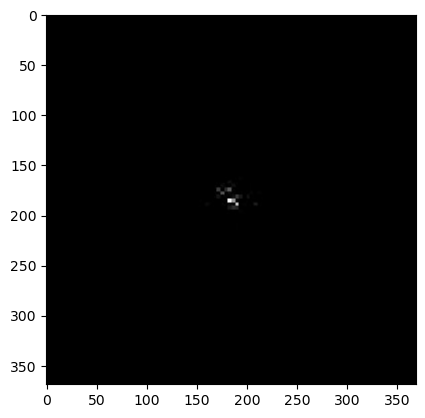

In [89]:
print("Number of Signal events in dataset:", len(signal))
print("Number of Background events dataset:", len(bg))
# print(bg_names)
plt.imshow(signal[6], cmap='grey')


In [90]:
for i in range(len(signal)):
    signal[i] = signal[i][100:280,100:300]
    signal[i]=skimage.transform.resize(signal[i],(64,64,1),mode='constant',preserve_range=True)
    bg[i]= bg[i][100:280,100:300]
    bg[i]=skimage.transform.resize(bg[i],(64,64,1),mode='constant',preserve_range=True)


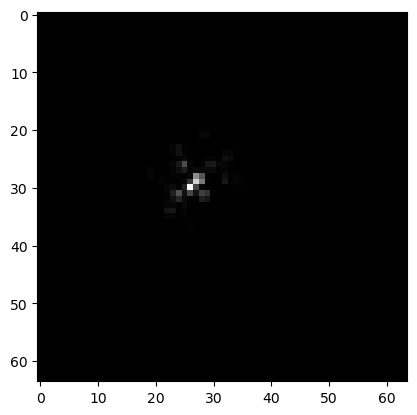

In [91]:
plt.imshow(signal[2], cmap='grey')

In [92]:
#split all signal images into 20% test 80% train ==> 0.2 TEST
s_train, s_test, s_names_train, s_names_test = train_test_split(signal, s_names, test_size=0.2, random_state=1)
#split 80% train into 25% (0.8*0.25) validation and 75% (0.8*0.75) train ==> 0.6 TRAIN 0.2 VALIDATION
s_train, s_val, s_names_train, s_names_val = train_test_split(s_train, s_names_train, test_size=0.25, random_state=1)

#split all bg images into 20% test 80% train ==> 0.2 TEST
bg_train, bg_test, bg_names_train, bg_names_test = train_test_split(bg, bg_names, test_size=0.2, random_state=1)
#split 80% train into 25% (0.8*0.25) validation and 75% (0.8*0.75) train ==> 0.6 TRAIN 0.2 VALIDATION
bg_train, bg_val, bg_names_train, bg_names_val = train_test_split(bg_train, bg_names_train, test_size=0.25, random_state=1)


x_train= np.array(s_train+bg_train)
y_train= np.array(s_names_train+bg_names_train)
x_train, y_train = shuffle(x_train, y_train)

x_test=  np.array(s_test+bg_test)
y_test= np.array(s_names_test+bg_names_test)
x_test, y_test = shuffle(x_test, y_test)


x_val= np.array(s_val+bg_val)
y_val=np.array(s_names_val+bg_names_val)
x_val, y_val = shuffle(x_val, y_val)


In [93]:
#Create a Sequential model
model = Sequential()


# Add the first Convolutional layer with L2 regularization
model.add(Conv2D(32, (11, 11), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01), input_shape=(64, 64, 1)))

# Add the first MaxPooling layer
model.add(MaxPooling2D(2, 2))

# Add the second layer: Dropout
model.add(Dropout(0.2))

# Add the second Convolutional layer with L2 regularization
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))

# Add the second MaxPooling layer
model.add(MaxPooling2D(3, 3))

model.add(Dropout(0.2))
# Add the third Convolutional layer with L2 regularization
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)))

# Add the third MaxPooling layer
model.add(MaxPooling2D(3, 3))

# Add Local Response Normalization
model.add(Lambda(tf.nn.lrn))

# Flatten the output before the Fully Connected layer
model.add(Flatten())

# Add a Dropout layer before the first Fully Connected layer
model.add(Dropout(0.2))

# Add the Fully Connected layer with 64 units
model.add(Dense(64, activation='relu'))

# Add a Dropout layer before the output layer
model.add(Dropout(0.1))

# Add the output layer with a Sigmoid activation
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 54, 54, 32)     │         3,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 27, 27, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 27, 27, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 25, 25, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 6, 6, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_4 (Lambda)               │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,721 (120.00 KB)

 Trainable params: 30,721 (120.00 KB)

 Non-trainable params: 0 (0.00 B)

In [94]:
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=1.e-3),
    metrics=['accuracy', tf.keras.metrics.AUC(curve='ROC')]
)

In [95]:
history= model.fit(x_train, y_train, epochs=30, validation_data=(x_val, y_val),verbose=2)

Epoch 1/30
8/8 - 1s - 110ms/step - accuracy: 0.4875 - auc_4: 0.4365 - loss: 1.3601 - val_accuracy: 0.5000 - val_auc_4: 0.6175 - val_loss: 1.3104
Epoch 2/30
8/8 - 0s - 33ms/step - accuracy: 0.5208 - auc_4: 0.5791 - loss: 1.2821 - val_accuracy: 0.5375 - val_auc_4: 0.6181 - val_loss: 1.2459
Epoch 3/30
8/8 - 0s - 32ms/step - accuracy: 0.5375 - auc_4: 0.5462 - loss: 1.2332 - val_accuracy: 0.5375 - val_auc_4: 0.6531 - val_loss: 1.1923
Epoch 4/30
8/8 - 0s - 33ms/step - accuracy: 0.5917 - auc_4: 0.6281 - loss: 1.1618 - val_accuracy: 0.5875 - val_auc_4: 0.6738 - val_loss: 1.1384
Epoch 5/30
8/8 - 0s - 35ms/step - accuracy: 0.5583 - auc_4: 0.5743 - loss: 1.1322 - val_accuracy: 0.5750 - val_auc_4: 0.6703 - val_loss: 1.0983
Epoch 6/30
8/8 - 0s - 37ms/step - accuracy: 0.6167 - auc_4: 0.6758 - loss: 1.0624 - val_accuracy: 0.5000 - val_auc_4: 0.6919 - val_loss: 1.0670
Epoch 7/30
8/8 - 0s - 33ms/step - accuracy: 0.5625 - auc_4: 0.6435 - loss: 1.0473 - val_accuracy: 0.5750 - val_auc_4: 0.6528 - val_loss

In [96]:
# model.save_weights('CNN1(40).h5')
# model.load_weights('CNN1(40).h5')

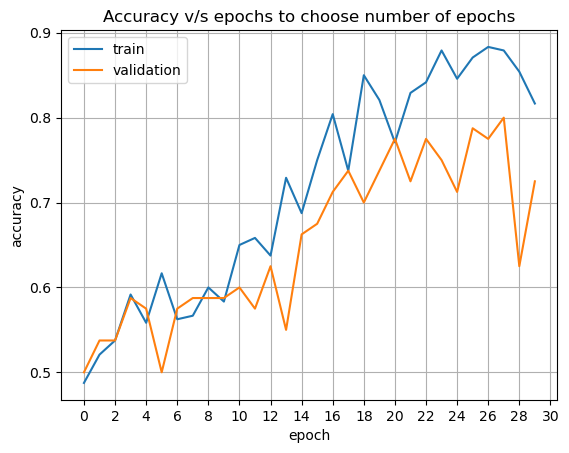

In [97]:
# print(model.predict(test_batches))
fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, 50, 2))
ax.set_yticks(np.arange(0, 1., 0.1))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.title("Accuracy v/s epochs to choose number of epochs")
plt.savefig('CNN1.png', bbox_inches='tight')
plt.show()

In [98]:
# Let’s evaluate our model performance
score = model.evaluate(x_test,y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7797 - auc_4: 0.9262 - loss: 0.5763 
Test loss: 0.6151153445243835
Test accuracy: 0.762499988079071


In [99]:
y_pred = model.predict(x_test)
y_pred[y_pred <= 0.5] = 0
y_pred[y_pred > 0.5] = 1
y_pred.reshape(-1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1.], dtype=float32)

In [100]:
y_test

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1])